# <p style="text-align:center">EE 379K: Lab Six</p>
# <p style="text-align:center">Kyle Grier and Stefan Bordovsky</p>
#### <p style="text-align:center">Due: Monday, 10/16 3:00pm</p>

<p>
    <b>Problem 1.</b> In this problem we will use synthetic data sets to explore the bias-variance tradeoff
    incurred by using regularization.
</p>
<p>
    <ul>
        <li>Generate data of the form:</li>
    </ul>
    <br>
    <div style="text-align:center">$y = X\beta + \epsilon,$</div>
</p>
<p style="padding-left:20px">
    <br>
    where $X$ is an $n \times p$ matrix where $n$ = 51, $p$ = 50, and each $X_{ij}$ ~ $N(0, 1)$. Also, generate
    the noise according to $\epsilon_i$ ~ $N(0, 1/4)$. Let $\beta$ be the all ones vector (for simplicity).
    <br>
    By repeatedly doing this experiment and generating fresh data (fresh $X$, and $y$, and hence $\epsilon$)
    but keeping $\beta$ fixed, you will estimate many different solutions, $\hat{\beta}$. Estimate the mean and
    variance of $\hat{\beta}$. Note that $\hat{\beta}$ is a vector, so for this exercise simply estimate the variance of a
    single component.
</p>

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrices
import pandas as pd
import random as rand

%matplotlib inline

n = 51
p = 50
beta_hats = []
std_dev = 1
num_regressions = 200

for i in range(num_regressions):
    X = np.zeros((n, p))
    X = np.random.normal(X, std_dev)
    e_std_dev = 1/4
    e = np.zeros(n)
    e = np.random.normal(e, e_std_dev)
    beta = np.ones(p)
    y = np.matmul(X, beta) + e
    reg = linear_model.LinearRegression()
    reg.fit(X, y)
    beta_coefficients = reg.coef_
    # Append first element of linear regression solution vector to beta_hats vector.
    beta_hats.append(beta_coefficients[0])
    
beta_hat_mean = np.mean(beta_hats)
beta_hat_var = np.var(beta_hats)

print("Beta hat mean = " + str(beta_hat_mean))
print("Beta hat var = " + str(beta_hat_var))



Beta hat mean = 1.0
Beta hat var = 4.37938929524e-27


<p>
    <ul>
        <li>Use ridge regression, i.e. $\ell_2$ regularization. Vary the regularization coefficient $\lambda$ = 0.01, 0.1, 1, 10, 
            100 and repeat the above experiment. What do you observe? As you increase $\lambda$ is the model becoming more 
            simple or more complex? As you increase $\lambda$ is performance becoming better
            or worse?
        </li>
    </ul>
</p>

In [38]:
from sklearn.linear_model import Ridge
lambdas = np.array([0.01, 0.1, 1, 10, 100])

# For each value of lambda, run ridge regression on randomly generated data described in part 1 of question 1.
for i in range(len(lambdas)):
    l2_reg_first_coef = []
    # Run ridge regression 
    for j in range(num_regressions):
        X = np.zeros((n, p))
        X = np.random.normal(X, std_dev)
        e_std_dev = 1/4
        e = np.zeros(n)
        e = np.random.normal(e, e_std_dev)
        beta = np.ones(p)
        y = np.matmul(X, beta) + e
        l2_reg = Ridge(alpha=lambdas[i])
        l2_reg.fit(X, y)
        l2_coefficients = l2_reg.coef_
        l2_reg_first_coef.append(l2_coefficients[0])
    l2_reg_coef_mean = np.mean(l2_reg_first_coef)
    l2_reg_coef_var = np.var(l2_reg_first_coef)
    
    print("Lambda value: " + str(lambdas[i]))
    print("Ridge Regression Coefficient Mean: " + str(l2_reg_coef_mean))
    print("Ridge Regression Coefficient Variance: " + str(l2_reg_coef_var))
        
        
    

Lambda value: 0.01
Ridge Regression Coefficient Mean: 0.984356463488
Ridge Regression Coefficient Variance: 0.0124958145485
Lambda value: 0.1
Ridge Regression Coefficient Mean: 0.957524444325
Ridge Regression Coefficient Variance: 0.0229356427258
Lambda value: 1.0
Ridge Regression Coefficient Mean: 0.876332395005
Ridge Regression Coefficient Variance: 0.0613470713789
Lambda value: 10.0
Ridge Regression Coefficient Mean: 0.620495113976
Ridge Regression Coefficient Variance: 0.100722844291
Lambda value: 100.0
Ridge Regression Coefficient Mean: 0.255006298671
Ridge Regression Coefficient Variance: 0.0483418694563


<p style="padding-left:60px">
     Increasing the value of $\lambda$ ends up decreasing the ridge regression mean for the coefficients of $X$ and generally increasing the variance for the coefficients of $X$. As $\lambda$ increases, the model is becoming more complex, which causes the decrease in variance but an increase in bias. For predicting coefficient mean, then, increasing $\lambda$ decreases performance. In the context of coefficient variance, increasing $\lambda$ increases performance.
</p>

<p>
    <b>Problem 2.</b> Problem 9 from Chapter 6.
    <br>
    (Predicting the number of applications in College) Note that you will have to read about PCR
    <br>
    (Principal Components Regression) and PLS (Partial Least Squares ) in the book, since we did not
    <br>
    discuss these in class.
</p>

<p style="padding-left:60px">
    9. In this exercise, we will predict the number of applications received using the other variables in the College data set.
    <div style="padding-left:80px">
        (a) Split the data set into a training set and a test set.
    </div>
</p>

In [130]:
# Referencing Chapter 6 Python lab exercises from Canvas.

from sklearn import linear_model
from sklearn import metrics as mt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn import cross_validation
import warnings
warnings.filterwarnings('ignore')

college_data = pd.read_csv('./College.csv')
college_data['IsPrivate'] = college_data['Private'].map({'Yes': 1, 'No': 0})
college_data.rename(columns={'F.Undergrad': 'FUndergrad', 'P.Undergrad': 'PUndergrad', 'Room.Board' : 'RoomBoard', 'S.F.Ratio' : 'SFRatio', 'perc.alumni' : 'PercAlumni' , 'Grad.Rate' : 'GradRate'}, inplace=True)
y2, X2 = dmatrices('Apps ~ IsPrivate + Accept + Enroll + Top10perc + Top25perc + FUndergrad + PUndergrad + Outstate + RoomBoard + Books + Personal + PhD + Terminal + SFRatio + PercAlumni + Expend + GradRate',
                  college_data, return_type="dataframe")

# Flatten y2 into a 1-D array by removing indices and leaving defaulted values.
y2 = np.ravel(y2)

college_data.head()
X2_training, X2_validation, y2_training, y2_validation = train_test_split(X2, y2, test_size=0.30, random_state=rand.randint(0, 10000))

<p style="padding-left:80px">
    (b) Fit a linear model using least squares on the training set, and report the test error obtained.
</p>

In [156]:
linear_model = LinearRegression()
linear_model.fit(X2_training, y2_training)

lsr_pred = linear_model.predict(X2_validation)
lsr_mse = mt.mean_squared_error(lsr_pred, y2_validation)
print("Test error for linear least squares regression model: " + str(lsr_mse))

Test error for linear least squares regression model: 1423613.15661


<p style="padding-left:80px">
    (c) Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.
</p>

In [157]:
# Generate an array of alphas from which to choose using cross-validation.
alphas = 10**np.linspace(10,-2,100)*0.5

# Fit ridge regression model on training sets using cross validation to select lambda.
ridge_cv_model = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridge_cv_model.fit(X2_training, y2_training)

ridge_model = Ridge(alpha=ridge_cv_model.alpha_)
ridge_model.fit(X2_training, y2_training)
rr_pred = ridge_model.predict(X2_validation)
rr_mse = mt.mean_squared_error(y2_validation, rr_pred)
print("Test error for ridge regression model with cross-validation: " + str(rr_mse))

Test error for ridge regression model with cross-validation: 1422654.89807


<p style="padding-left:80px">
    (d) Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.
</p>

In [158]:
num_cross_validation_folds = 10

lasso_cv_model = LassoCV(alphas=None, cv=num_cross_validation_folds, max_iter=10000)
lasso_cv_model.fit(X2_training, y2_training)

lasso_model = Lasso(max_iter=10000)
lasso_model.set_params(alpha=lasso_cv_model.alpha_)
lasso_model.fit(X2_training, y2_training)
lasso_pred = lasso_model.predict(X2_validation)
lasso_mse = mt.mean_squared_error(y2_validation, lasso_model.predict(X2_validation))

# Some of the coefficients are now reduced to exactly zero.
print("Test error for Lasso: " + str(lasso_mse))
print
print("Number of non-zero coefficient estimates from the Lasso CV model = 2. See table below.")
print("Coefficient estimates from Lasso CV model: ")
pd.Series(lasso_model.coef_, index=X2.columns)

Test error for Lasso: 1527730.31741

Number of non-zero coefficient estimates from the Lasso CV model = 2. See table below.
Coefficient estimates from Lasso CV model: 


Intercept     0.000000
IsPrivate    -0.000000
Accept        1.288348
Enroll        0.000000
Top10perc     0.000000
Top25perc     0.000000
FUndergrad    0.054518
PUndergrad   -0.000000
Outstate     -0.035090
RoomBoard     0.097723
Books         0.000000
Personal     -0.000000
PhD           0.000000
Terminal     -0.000000
SFRatio       0.000000
PercAlumni   -0.000000
Expend        0.140009
GradRate      0.000000
dtype: float64

<p style="padding-left:80px">
    (e) Fit a PCR model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.
</p>

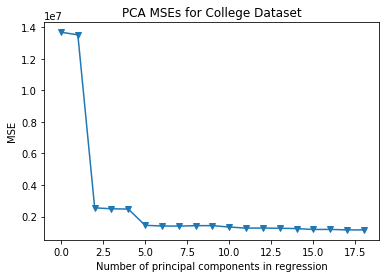

As shown in the above plot, using all 18 principal components yields the smallest MSE.
Test error for PCR model: 9680699.8753
M = 18


In [159]:
# Transform X2 into matrix with reduced dimensionality
pca_model = PCA()
X_reduced = pca_model.fit_transform(X2_training)

# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), y2_training.ravel(), cv=kf_10, scoring='mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 18 principle components, adding one component at the time.
for i in np.arange(1, 19):
    score = -1*cross_validation.cross_val_score(regr, X_reduced[:,:i], y2_training.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)

plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('PCA MSEs for College Dataset')
plt.xlim(xmin=-1);
plt.show()

print("As shown in the above plot, using all 18 principal components yields the smallest MSE.")

regr_test = LinearRegression()
regr_test.fit(X_reduced, y2_training)

pca_model_2 = PCA()
X2_validation_reduced = pca_model_2.fit_transform(X2_validation)[:,:18]
pcr_pred = regr_test.predict(X2_validation_reduced)
pcr_mse = mt.mean_squared_error(pcr_pred, y2_validation)
print("Test error for PCR model: " + str(pcr_mse))
min_index = mse.index(min(mse))
print("M = " + str(min_index + 1))

<p style="padding-left:80px">
    (f) Fit a PLS model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.
</p>

Lowest MSE found for the following number of principal components: 11
Test error for PCR model: 1475628.9939
M = 11


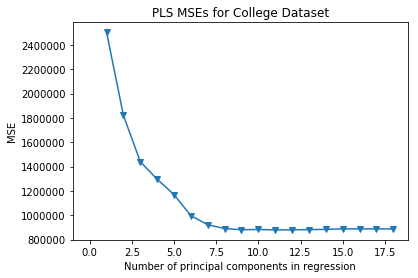

In [175]:
n = len(X2_validation)

# 10-fold cross-validation with shuffle.
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 19):
    pls_model = PLSRegression(n_components=i)
    score = cross_validation.cross_val_score(pls_model, X2_training, y2_training, cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 19), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('PLS MSEs for College Dataset')
plt.xlim(xmin=-1)

min_index = mse.index(min(mse))
print("Lowest MSE found for the following number of principal components: " + str(min_index + 1))

pls_model = PLSRegression(n_components=min_index)
pls_model.fit(X2_training, y2_training)

pls_pred = pls_model.predict(X2_validation)
pls_mse = mt.mean_squared_error(y2_validation, pls_pred)

print("Test error for PCR model: " + str(pls_mse))
print("M = " + str(min_index + 1))

<p style="padding-left:80px">
    (g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?
    <div style="padding-left:100px">
        
    </div>
</p>

In [163]:
print("Least squares regression MSE: " + str(lsr_mse))
print("Ridge regression MSE: " + str(rr_mse))
print("Lasso MSE: " + str(lasso_mse))
print("PCR MSE: " + str(pcr_mse))
print("PLS MSE: " + str(pls_mse))

Least squares regression MSE: 1423613.15661
Ridge regression MSE: 1422654.89807
Lasso MSE: 1527730.31741
PCR MSE: 9680699.8753
PLS MSE: 1475628.9939


<p style="padding-left:100px">
    As seen above, least squares regression and ridge regression models have roughly the same mean squared error when used to predict the number of college applications received, followed by PLS and Lasso models. The least successful model for predicting the number of college apps received is Principal Component Regression, which had the highest MSE by far.
    <br>
    <br>
    Since $R^2$ values describe the goodness of fit of statistical models, we will calculate them for each model's predictions and evaluate them to determine the accuracy of each model's prediction of the number of college apps received. 
</p>

In [188]:
# Referencing https://en.wikipedia.org/wiki/Coefficient_of_determination
# R2 = 1 - SSres/SStot
# SSres = sum((y2_validation[i] - model_pred[i])^2)
# SStot = sum((y2_validation[i] - mean(y2_validation))^2)

y2_validation_mean = np.mean(y2_validation)
y2_validation_diff_from_mean = []
y2_validation_diff_from_mean[:] = [x - y2_validation_mean for x in y2_validation]
SS_tot = np.sum(np.square(y2_validation_diff_from_mean))

lsr_r2 = 1 - np.mean(np.square(y2_validation - lsr_pred)) / SS_tot
rr_r2 = 1 - np.mean(np.square(y2_validation - rr_pred)) / SS_tot
lasso_r2 = 1 - np.mean(np.square(y2_validation - lasso_pred)) / SS_tot
pcr_r2 = 1 - np.mean(np.square(y2_validation - pcr_pred)) / SS_tot
pls_r2 = 1 - np.mean(np.square(y2_validation - pls_pred)) / SS_tot

print("R2 Coefficient for Least Squares Regression Model: " + str(lsr_r2))
print("R2 Coefficient for Ridge Regression Model: " + str(rr_r2))
print("R2 Coefficient for Lasso Model: " + str(lasso_r2))
print("R2 Coefficient for PCR Model: " + str(pcr_r2))
print("R2 Coefficient for PLS Model: " + str(pls_r2))

R2 Coefficient for Least Squares Regression Model: 0.999662434108
R2 Coefficient for Ridge Regression Model: 0.999662661329
R2 Coefficient for Lasso Model: 0.999637745939
R2 Coefficient for PCR Model: 0.997704521012
R2 Coefficient for PLS Model: 0.99235313167


<p style="padding-left:100px">
    The $R^2$ coefficients for each model are all higher than 0.99, with LSR, RR, and Lasso having the highest $R^2$ values of > 0.999. This suggests that all models are extremely effective at predicting college applications received based on the College dataset, though in order of accuracy RR > LSR > Lasso > PCR > PLS.
</p>